# Test du modèle Cora AI (900 espèces)

In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
from IPython.display import display

In [2]:
# Load TFLite model
model_path = r'mobilenet_v2_1.0_224_inat_bird_quant.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()


In [3]:
# Load labels
labels_path = r'labels.txt'
with open(labels_path, 'r') as f:
    labels = [line.strip() for line in f.readlines()]
print("Number of labels:", len(labels))


Number of labels: 965


In [4]:
# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input details", input_details)
print("Output details", output_details)

Input details [{'name': 'map/TensorArrayStack/TensorArrayGatherV3', 'index': 0, 'shape': array([  1, 224, 224,   3]), 'shape_signature': array([  1, 224, 224,   3]), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.0078125, 128), 'quantization_parameters': {'scales': array([0.0078125], dtype=float32), 'zero_points': array([128]), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details [{'name': 'prediction', 'index': 171, 'shape': array([  1, 965]), 'shape_signature': array([  1, 965]), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.00390625, 0), 'quantization_parameters': {'scales': array([0.00390625], dtype=float32), 'zero_points': array([0]), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [5]:
# Prepare input data (modify this according to your model's input requirements)
image_path = r'IMG_05719.jpg'
image = Image.open(image_path)


#image = image.resize((320, 320))  # Adjust size according to your model's input size
image = image.resize((224, 224))  # Adjust size according to your model's input size

#input_data = np.expand_dims(image, axis=0).astype(np.float32) / 255.0  # Normalize to [0, 1]
input_data = np.expand_dims(image, axis=0)


In [6]:
# Set input tensor data
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference
interpreter.invoke()

# Get output tensor data
output_data = interpreter.get_tensor(output_details[0]['index'])

In [7]:
# Map output data to labels
predicted_label_index = np.argmax(output_data)
predicted_label = labels[predicted_label_index]
print("Predicted Label Index:", predicted_label_index)

Predicted Label Index: 275


In [8]:
# Print or use the predicted label
print("Predicted Label:", predicted_label)

# Print the output_data
print("Output Data:", output_data)

Predicted Label: Psittacula krameri (Rose-ringed Parakeet)
Output Data: [[  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   

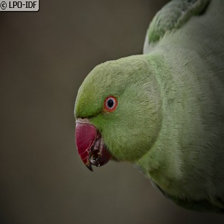

In [9]:
#display image
display(image)